In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("deep")

In [80]:
df = pd.read_excel("data/Ati_anonimo.xlsx")

df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4326 entries, 0 to 4325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   COMISION     4326 non-null   object
 1   ACTA         4326 non-null   int64 
 2   NRO. INSCR   4326 non-null   int64 
 3   CARRERA      4326 non-null   object
 4   Carrera-Nom  4326 non-null   object
 5   DNI          4326 non-null   int64 
 6   NOTA         4326 non-null   object
dtypes: int64(3), object(4)
memory usage: 236.7+ KB


,ACTA,NRO. INSCR,DNI
count,4326.000000,4326.00000,4.326000e+03
mean,5886.727924,159035.49607,4.671767e+07
std,7.577221,16771.96165,2.585046e+07
min,5874.000000,9726.00000,4.481439e+06
25%,5880.000000,161105.50000,4.553236e+07
50%,5887.000000,163766.00000,4.701374e+07
75%,5893.000000,165307.75000,4.759795e+07
max,5899.000000,167182.00000,1.351537e+09


In [81]:
# Check duplicate rows
mask_dup = df.duplicated(subset=["NRO. INSCR", "DNI"], keep=False)
print(df)
print(mask_dup)
print(f"df[8:14]: {df[8:14]}")
print(f"mask_dup[9]: {mask_dup[9]}")
print(f"mask_dup[10]: {mask_dup[10]}")
print(f"Number of duplicate rows: {mask_dup.sum()}")
print(df["NOTA"][mask_dup])

for nota_string in df["NOTA"][mask_dup].unique():
    print(f"{nota_string}: {sum(df["NOTA"][mask_dup] == nota_string)}")

     COMISION  ACTA  NRO. INSCR CARRERA  \
0         M27  5889      163055     197   
1         M24  5887      159282      50   
2         M24  5887      159282     181   
3          M4  5877      133625     202   
4         M24  5887      162903     181   
...       ...   ...         ...     ...   
4321       M3  5876      152577       3   
4322       B5  5895      139296     218   
4323      M24  5887      164010      50   
4324      M24  5887      164010     181   
4325      M24  5887      164010     186   

                                 Carrera-Nom       DNI         NOTA  
0                               Arquitectura  47279352     Aprobado  
1         Lic. en Ciencias de la Computación  46102793  Desaprobado  
2         Ing. en Sistemas de la Información  46102793  Desaprobado  
3     Tec. Univ. en Operaciones Industriales  42626430      Ausente  
4         Ing. en Sistemas de la Información  46944891     Aprobado  
...                                      ...       ...         

In [82]:
for comision_string in df["COMISION"][mask_dup].unique():
    print(f"{comision_string}: {sum(df["COMISION"][mask_dup] == comision_string)}")

print(f"Number of comision-classes in duplicates: {len(df["COMISION"][mask_dup].unique())}")
print(f"Number of comision-classe in total: {len(df["COMISION"].unique())}")

def get_notas(dni):
    return df["NOTA"][df["DNI"] == dni]

def get_comisiones(dni):
    return df["COMISION"][df["DNI"] == dni]

for dni in df["DNI"][mask_dup].unique():
    print(f"Number of classes for DNI {dni}: {len(df["COMISION"][df["DNI"] == dni])}")
    print(f"Notas for DNI {dni}: {np.array(get_notas(dni))}")
    print(f"Comisiones for DNI {dni}: {np.array(get_comisiones(dni))}")

M24: 37
M17: 7
M12: 33
M3: 21
B3: 29
M10: 27
M22: 27
B4: 18
M21: 40
M27: 17
M2: 41
B5: 40
B7: 27
M4: 33
M9: 26
M23: 22
B6: 26
M16: 23
B2: 29
B9: 24
B1: 24
M26: 23
M8: 20
B8: 24
M1: 40
M11: 11
Number of comision-classes in duplicates: 26
Number of comision-classe in total: 26
Number of classes for DNI 46102793: 2
Notas for DNI 46102793: ['Desaprobado' 'Desaprobado']
Comisiones for DNI 46102793: ['M24' 'M24']
Number of classes for DNI 47477714: 2
Notas for DNI 47477714: ['Aprobado' 'Aprobado']
Comisiones for DNI 47477714: ['M17' 'M17']
Number of classes for DNI 47671174: 2
Notas for DNI 47671174: ['Aprobado' 'Aprobado']
Comisiones for DNI 47671174: ['M12' 'M3']
Number of classes for DNI 48019909: 4
Notas for DNI 48019909: ['Aprobado' 'Aprobado' 'Aprobado' 'Aprobado']
Comisiones for DNI 48019909: ['B3' 'M10' 'M22' 'M22']
Number of classes for DNI 46797255: 3
Notas for DNI 46797255: ['Desaprobado' 'Desaprobado' 'Desaprobado']
Comisiones for DNI 46797255: ['B4' 'M21' 'M27']
Number of classe

In [83]:
counter = 0
print_same = False

for dni in df["DNI"][mask_dup].unique():
    # print("--------------")
    # print(f"DNI: {dni}")
    # print(f"Number of courses: {len(df["COMISION"][df["DNI"] == dni])}")
    for comision in df["COMISION"][df["DNI"] == dni].unique():
        # print(f"Comision: {comision}")
        # print(f"Notas for Comision: {np.array(df["NOTA"][df["DNI"] == dni][df["COMISION"] == comision])}")
        if df["NOTA"][df["DNI"] == dni][df["COMISION"] == comision].unique().size > 1:
            print("Different notas for the same comision")
            print(f"DNI: {dni}")
            print(f"Number of courses: {len(df["COMISION"][df["DNI"] == dni])}")
            print(f"Comision: {comision}")
            print(f"Notas for Comision: {np.array(df["NOTA"][df["DNI"] == dni][df["COMISION"] == comision])}")
            print("--------------")
            counter += 1
        else:
            if print_same:
                print("Same nota for the same comision")
                print(f"DNI: {dni}")
                print(f"Number of courses: {len(df["COMISION"][df["DNI"] == dni])}")
                print(f"Comision: {comision}")
                print(f"Notas for Comision: {np.array(df["NOTA"][df["DNI"] == dni][df["COMISION"] == comision])}")
                print("--------------")
    
print(f"Number of different notas for the same comision: {counter}")

Number of different notas for the same comision: 0


In [84]:
comision_b = df[df['COMISION'].str.startswith('B')]
comision_m = df[df['COMISION'].str.startswith('M')]

print(f"Quota de aprobados de comisiones con B: {sum(comision_b["NOTA"] == "Aprobado") / len(comision_b) * 100:.2f}%")
print(f"Quota de aprobados de comisiones con M: {sum(comision_m["NOTA"] == "Aprobado") / len(comision_m) * 100:.2f}%")

# apropados por carrera
for carrera in df["Carrera-Nom"].unique():
    entries_for_carrera = df[df["Carrera-Nom"] == carrera]
    print(f"Quota de aprobados de comisiones con {carrera}: {sum(entries_for_carrera["NOTA"] == "Aprobado") / len(entries_for_carrera) * 100:.2f}%")

# apropados in todo
print(f"Quota de aprobados en total: {sum(df["NOTA"] == "Aprobado") / len(df) * 100:.2f}%")

Quota de aprobados de comisiones con B: 40.80%
Quota de aprobados de comisiones con M: 39.26%
Quota de aprobados de comisiones con Arquitectura: 47.59%
Quota de aprobados de comisiones con Lic. en Ciencias de la Computación: 45.71%
Quota de aprobados de comisiones con Ing. en Sistemas de la Información: 50.51%
Quota de aprobados de comisiones con Tec. Univ. en Operaciones Industriales: 19.82%
Quota de aprobados de comisiones con Tec. Univ. en Deporte: 26.15%
Quota de aprobados de comisiones con Lic. en Administración: 41.10%
Quota de aprobados de comisiones con TUSEII: 16.42%
Quota de aprobados de comisiones con Ing. Química: 69.75%
Quota de aprobados de comisiones con Ing. Agronómica: 29.88%
Quota de aprobados de comisiones con Farmacia: 42.07%
Quota de aprobados de comisiones con Contador Público: 44.29%
Quota de aprobados de comisiones con Ing. Electrónica: 48.28%
Quota de aprobados de comisiones con Bioquímica: 39.22%
Quota de aprobados de comisiones con Ing. Civil: 56.98%
Quota de

<Axes: title={'center': 'Notas de comisiones con B'}, ylabel='count'>

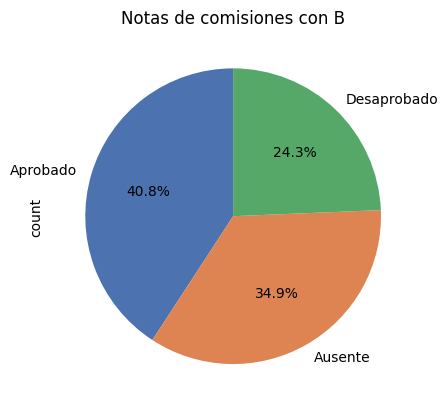

In [85]:
df.NOTA[df.COMISION.str.startswith("B")].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, title="Notas de comisiones con B")

<Axes: title={'center': 'Notas de comisiones con M'}, ylabel='count'>

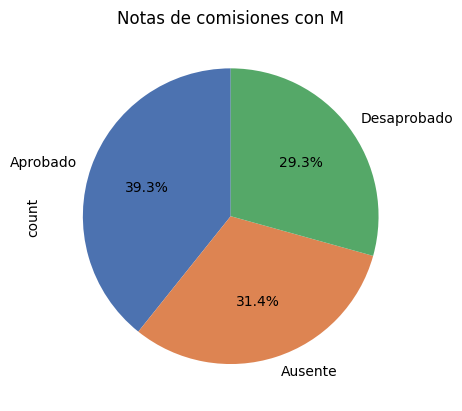

In [86]:
df.NOTA[df.COMISION.str.startswith("M")].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, title="Notas de comisiones con M")

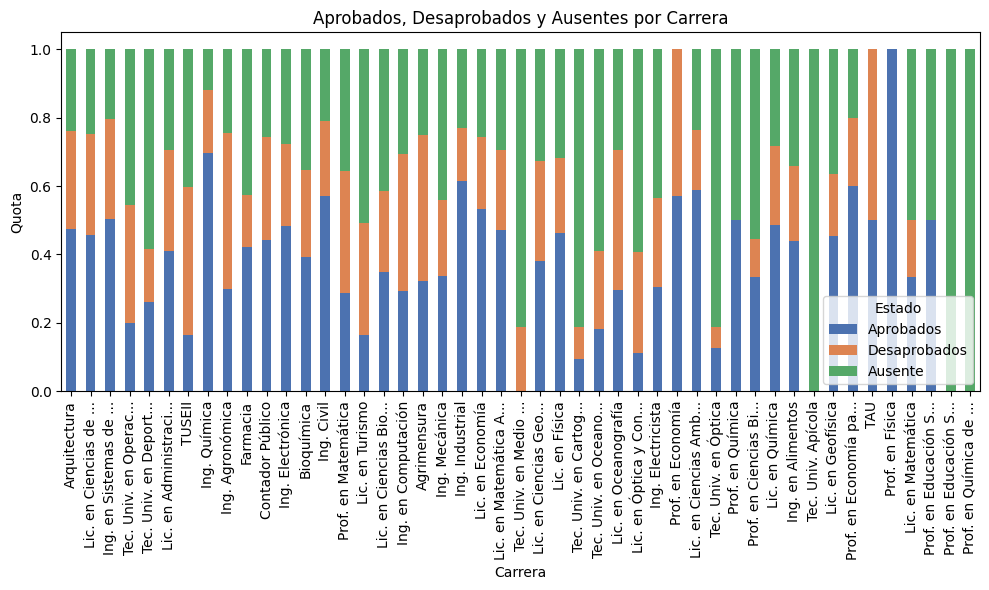

In [87]:
df_carreras = pd.DataFrame(df["Carrera-Nom"].unique(), columns=["Carrera-Nom"])
df_carreras["Aprobados"] = df_carreras["Carrera-Nom"].apply(lambda x: sum(df[df["Carrera-Nom"] == x]["NOTA"] == "Aprobado"))
df_carreras["Desaprobados"] = df_carreras["Carrera-Nom"].apply(lambda x: sum(df[df["Carrera-Nom"] == x]["NOTA"] == "Desaprobado"))
df_carreras["Ausente"] = df_carreras["Carrera-Nom"].apply(lambda x: sum(df[df["Carrera-Nom"] == x]["NOTA"] == "Ausente"))
# normalize to percentage row-wise
df_carreras[["Aprobados", "Desaprobados", "Ausente"]] = df_carreras[["Aprobados", "Desaprobados", "Ausente"]].div(df_carreras[["Aprobados", "Desaprobados", "Ausente"]].sum(axis=1), axis=0)

# shorten labels to 20 characters
df_carreras["Carrera-Nom"] = df_carreras["Carrera-Nom"].apply(lambda x: x[:20] + "..." if len(x) > 20 else x)

# create stacked bar plot
df_carreras.set_index("Carrera-Nom")[["Aprobados", "Desaprobados", "Ausente"]].plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Aprobados, Desaprobados y Ausentes por Carrera")
plt.xlabel("Carrera")
plt.ylabel("Quota")
plt.xticks(rotation=90)

plt.legend(title="Estado")
plt.tight_layout()
plt.show()

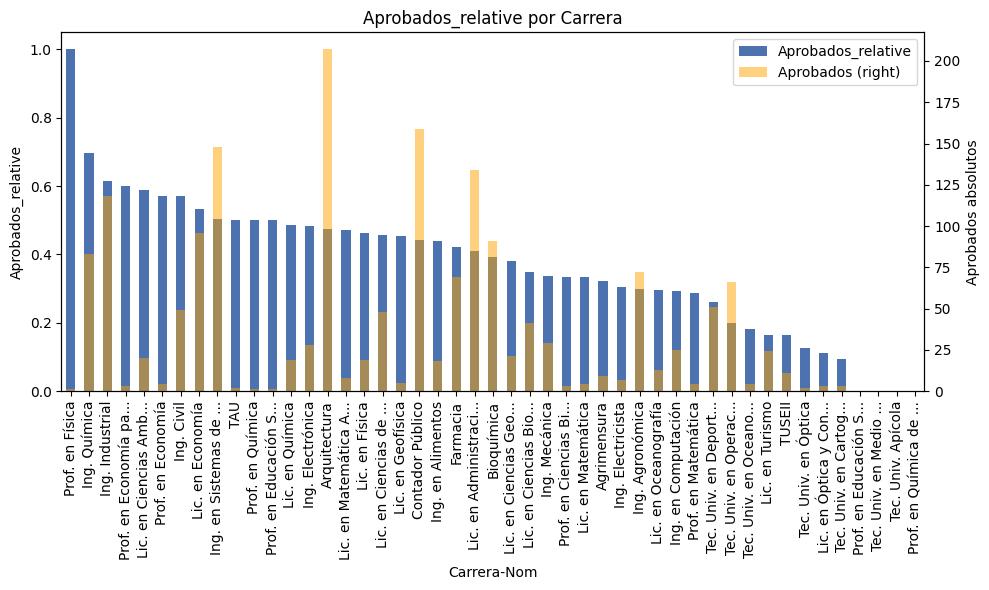

In [ ]:
df_carreras = pd.DataFrame(df["Carrera-Nom"].unique(), columns=["Carrera-Nom"])
df_carreras["Aprobados"] = df_carreras["Carrera-Nom"].apply(lambda x: sum(df[df["Carrera-Nom"] == x]["NOTA"] == "Aprobado"))
# normalize to percentage row-wise
df_carreras["Aprobados_relative"] = df_carreras.apply(lambda x: x["Aprobados"] / sum(df["Carrera-Nom"] == x["Carrera-Nom"]), axis=1)

# sort by apropados relative
df_carreras = df_carreras.sort_values(by="Aprobados_relative", ascending=False)

# shorten labels to 20 characters
df_carreras["Carrera-Nom"] = df_carreras["Carrera-Nom"].apply(lambda x: x[:20] + "..." if len(x) > 20 else x)

# create stacked bar plot
df_carreras.set_index("Carrera-Nom")[["Aprobados_relative"]].plot(kind="bar", figsize=(10, 6))
plt.ylabel("Aprobados_relative")
# apply second y axis with absolutes
df_carreras.set_index("Carrera-Nom")[["Aprobados"]].plot(kind="bar", secondary_y=True, color="orange", alpha=0.5, ax=plt.gca())
# set second ylabel
plt.gca().set_ylabel("Aprobados absolutos")
plt.title("Aprobados por Carrera")
plt.xlabel("Carrera")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [102]:
# get first 20 carreras by number of participants
df_carreras = pd.DataFrame(df["Carrera-Nom"].unique(), columns=["Carrera-Nom"])
# new df with distinct people and just keep the carrera and carrera name
df_unique_student = df.drop_duplicates(subset=["DNI"])
df_carreras["Nro. Inscrip"] = df_carreras["Carrera-Nom"].apply(lambda x: sum(df_unique_student["Carrera-Nom"] == x))
df_carreras = df_carreras.sort_values(by="Nro. Inscrip", ascending=False)
print(df_carreras.head(20))

                               Carrera-Nom  Nro. Inscrip
0                             Arquitectura           412
10                        Contador Público           359
5                   Lic. en Administración           306
3   Tec. Univ. en Operaciones Industriales           299
2       Ing. en Sistemas de la Información           259
12                              Bioquímica           225
8                          Ing. Agronómica           221
4                    Tec. Univ. en Deporte           190
20                         Ing. Industrial           174
21                        Lic. en Economía           163
9                                 Farmacia           155
15                         Lic. en Turismo           130
16             Lic. en Ciencias Biológicas           116
7                             Ing. Química           101
1       Lic. en Ciencias de la Computación           100
13                              Ing. Civil            74
19                           In

In [103]:
# get first 20 carreras by number of participants
df_carreras = pd.DataFrame(df["COMISION"].unique(), columns=["COMISION"])
df_carreras["Nro. Inscrip"] = df_carreras["COMISION"].apply(lambda x: sum(df_unique_student["COMISION"] == x))
df_carreras = df_carreras.sort_values(by="Nro. Inscrip", ascending=False)
print(df_carreras.head(20))

   COMISION  Nro. Inscrip
10       B1           207
17       B6           179
15       B3           169
3        B9           169
13       B4           168
12       B7           165
24       M1           163
18       B8           157
23       B5           156
21      M16           156
1       M24           156
4        B2           153
19      M23           151
7       M17           147
11      M12           145
0       M27           144
2        M4           142
22      M26           139
9       M10           138
20       M3           138


min: 4481439, max: 1351537079


/var/folders/0n/bb4_kwsn3n5c5_7n_mgl2n540000gn/T/ipykernel_15253/2435258978.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_student["DNI rango"] = df_unique_student["DNI"].apply(get_dni_range)


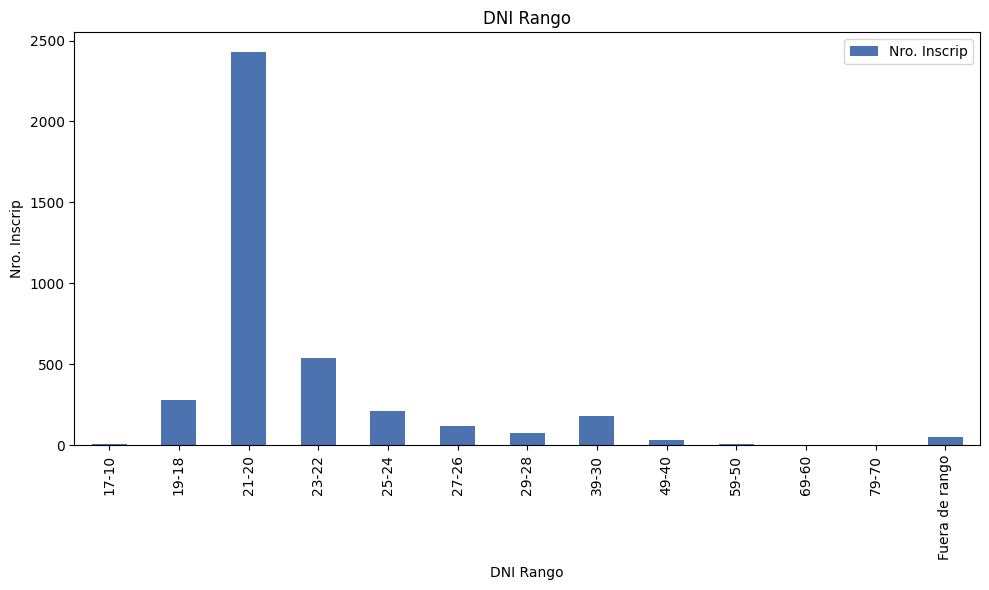

In [107]:
# DNI analysis
print(f"min: {min(df_unique_student["DNI"])}, max: {max(df_unique_student["DNI"])}")

# ranges of DNI from gemini
df_dni = pd.DataFrame([["99-90", 10000, 1000000],
              ["89-80", 1000001, 2500000],
              ["79-70", 2500001, 6000000],
              ["69-60", 6000001, 12000000],
              ["59-50", 12000001, 18000000],
              ["49-40", 18000001, 25000000],
              ["39-30", 25000001, 38000000],
              ["29-28", 38000001, 40000000],
              ["27-26", 40000001, 42000000],
              ["25-24", 42000001, 44000000],
              ["23-22", 44000001, 46000000],
              ["21-20", 46000001, 48000000],
              ["19-18", 48000001, 50000000],
              ["17-10", 50000001, 55000000]],
              columns=["DNI rango", "min", "max"])

# create histogram of DNI with given ranges in df_dni
def get_dni_range(dni):
    for i in range(len(df_dni)):
        if df_dni["min"][i] <= dni <= df_dni["max"][i]:
            return df_dni["DNI rango"][i]
    return "Fuera de rango"
df_unique_student["DNI rango"] = df_unique_student["DNI"].apply(get_dni_range)
# count the number of students in each range
df_dni_count = df_unique_student["DNI rango"].value_counts().reset_index()
df_dni_count.columns = ["DNI rango", "Nro. Inscrip"]
# sort by DNI rango
df_dni_count = df_dni_count.sort_values(by="DNI rango", ascending=True)
# create bar plot
df_dni_count.set_index("DNI rango").plot(kind="bar", figsize=(10, 6))
plt.title("DNI Rango")
plt.xlabel("DNI Rango")
plt.ylabel("Nro. Inscrip")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
